In [22]:
suppressMessages(library(Seurat, verbose=F))
library(ggplot2, verbose=F)
library(patchwork, verbose=F)
library(magrittr, verbose=F)
library(data.table, verbose=F)
#设置当前工作目录
setwd('/Users/wjs/Desktop/github/singlecell_notebooks')

In [23]:
library(GSVA)
library(org.Hs.eg.db)
library(msigdbr)
suppressMessages(library(clusterProfiler, verbose=F))

In [24]:
sce <- readRDS('data/sce.RDS')

# GSEA

In [25]:
df <- data.table(sce@misc$marker_res0.2_all)

In [26]:
getGeneList <- function(df){
    geneList = df$avg_log2FC
    names(geneList) <- df$gene
    geneList <- sort(geneList, decreasing = T)
    genesid <- AnnotationDbi::select(org.Hs.eg.db, keys=names(geneList),
                                 columns=c('ENTREZID'),
                                 keytype = 'SYMBOL')
    id_geneList <- geneList
    names(id_geneList) <- genesid[!duplicated(genesid$SYMBOL),]$ENTREZID
    return(list(geneList, id_geneList))
}

In [27]:
genes <- getGeneList(df[cluster==1])

'select()' returned 1:many mapping between keys and columns



In [32]:
kegg_gsea <- gseKEGG(genes[[2]], organism = "hsa", keyType = "ncbi-geneid", verbose = F)

Reading KEGG annotation online: "https://rest.kegg.jp/link/hsa/pathway"...

Reading KEGG annotation online: "https://rest.kegg.jp/list/pathway/hsa"...

Reading KEGG annotation online: "https://rest.kegg.jp/conv/ncbi-geneid/hsa"...

Warning message in preparePathwaysAndStats(pathways, stats, minSize, maxSize, gseaParam, :
“There are duplicate gene names, fgsea may produce unexpected results.”


In [33]:
mf_gsea <- gseGO(genes[[2]], ont='MF', OrgDb = org.Hs.eg.db, verbose = F)
#cc_gsea <- gseGO(genes[[2]], ont='CC', OrgDb = org.Hs.eg.db, verbose = F)
#bp_gsea <- gseGO(genes[[2]], ont='BP', OrgDb = org.Hs.eg.db, verbose = F)

Warning message in preparePathwaysAndStats(pathways, stats, minSize, maxSize, gseaParam, :
“There are duplicate gene names, fgsea may produce unexpected results.”


In [36]:
sig_mf_gsea <- mf_gsea@result[mf_gsea@result$`p.adjust`<0.05 & mf_gsea@result$NES >1, ]
sig_kegg_gsea <- kegg_gsea@result[kegg_gsea@result$`p.adjust`<0.05 & kegg_gsea@result$NES >1, ]

In [37]:
head(sig_mf_gsea)

,ID,Description,setSize,enrichmentScore,NES,pvalue,p.adjust,qvalue,rank,leading_edge,core_enrichment
,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
GO:0038187,GO:0038187,pattern recognition receptor activity,15,0.9105576,2.404754,2.861099e-10,1.808215e-07,1.523912e-07,586,"tags=100%, list=9%, signal=91%",26253/338339/929/5724/948/2219/64581/7097/51311/7099/8685/64127/51284/949/23643
GO:0038023,GO:0038023,signaling receptor activity,278,0.3840086,1.821879,6.967695e-07,1.467861e-04,1.237071e-04,778,"tags=36%, list=12%, signal=33%",26253/338339/929/133396/1441/54210/1903/8794/5724/1902/5618/22918/290/2209/2357/948/124599/79168/2219/5029/2048/1438/1230/4035/126014/64581/7097/11025/342510/51311/7099/2850/2350/150372/945/8578/729230/8685/53829/3383/3597/5819/64127/2212/5329/5817/30817/2649/196/25960/11027/6256/7100/50856/284021/146722/5791/9936/10461/23654/6272/10288/353514/728/942/23129/11024/3643/7421/10261/3460/10154/3556/8321/1512/7132/5362/51284/151306/949/10871/5739/2322/23643/2123/3274/91/19/5023/23765/79627/4853/7133/719/10333/1436/5027/3601/3570/706
GO:0060089,GO:0060089,molecular transducer activity,278,0.3840086,1.821879,6.967695e-07,1.467861e-04,1.237071e-04,778,"tags=36%, list=12%, signal=33%",26253/338339/929/133396/1441/54210/1903/8794/5724/1902/5618/22918/290/2209/2357/948/124599/79168/2219/5029/2048/1438/1230/4035/126014/64581/7097/11025/342510/51311/7099/2850/2350/150372/945/8578/729230/8685/53829/3383/3597/5819/64127/2212/5329/5817/30817/2649/196/25960/11027/6256/7100/50856/284021/146722/5791/9936/10461/23654/6272/10288/353514/728/942/23129/11024/3643/7421/10261/3460/10154/3556/8321/1512/7132/5362/51284/151306/949/10871/5739/2322/23643/2123/3274/91/19/5023/23765/79627/4853/7133/719/10333/1436/5027/3601/3570/706
GO:0031406,GO:0031406,carboxylic acid binding,39,0.6547588,2.265714,3.000223e-06,4.740352e-04,3.995033e-04,1005,"tags=56%, list=16%, signal=48%",6279/6280/116362/8974/2219/100049587/2350/945/27180/8778/6256/5836/7421/23569/5660/6573/6809/5306/5351/5914/2752/2950
GO:0005509,GO:0005509,calcium ion binding,180,0.4004776,1.810890,8.668262e-06,1.095668e-03,9.233980e-04,733,"tags=26%, list=11%, signal=24%",26253/1824/6283/1462/6279/6280/2201/11240/22918/79056/23166/4035/6695/8291/6546/182/79772/55959/115727/30817/5321/170591/7226/56975/50856/4811/5359/25801/54947/1608/6453/23569/10645/7086/5331/9489/23236/11261/23158/3949/340527/6282/308/199/4853/302/54997
GO:0015075,GO:0015075,ion transmembrane transporter activity,213,0.3775780,1.743077,1.518021e-05,1.370556e-03,1.155066e-03,1302,"tags=35%, list=20%, signal=29%",85413/948/6583/55799/123041/10008/56606/6556/56659/368/1318/6546/203859/1536/3753/785/123096/7226/51296/80727/7779/3779/376497/535/94097/6573/1184/1317/6533/9114/25932/523/9123/9424/206358/5023/302/526/11182/5027/94015/2185/28232/53373/23507/3784/219931/57210/93589/57192/3748/6277/490/79572/533/56996/23446/5663/10723/55129/10165/201266/55238/29957/55144/117144/10312/6522/527/4891/10560/488/3927/1185


In [42]:
options(repr.plot.width=8, repr.plot.height=6)

In [43]:
p <- dotplot(kegg_gsea, font.size=8, showCategory = 10)

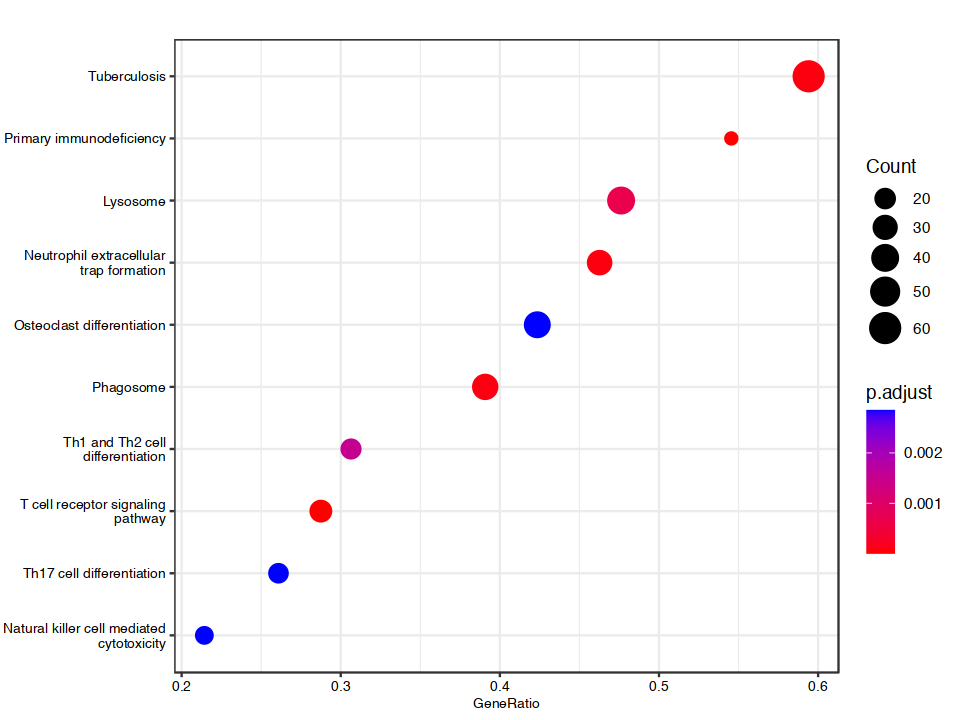

In [44]:
p

In [45]:
p <- ridgeplot(kegg_gsea, orderBy = "NES", showCategory = 10) + labs(x = "enrichment distribution")

Picking joint bandwidth of 0.404



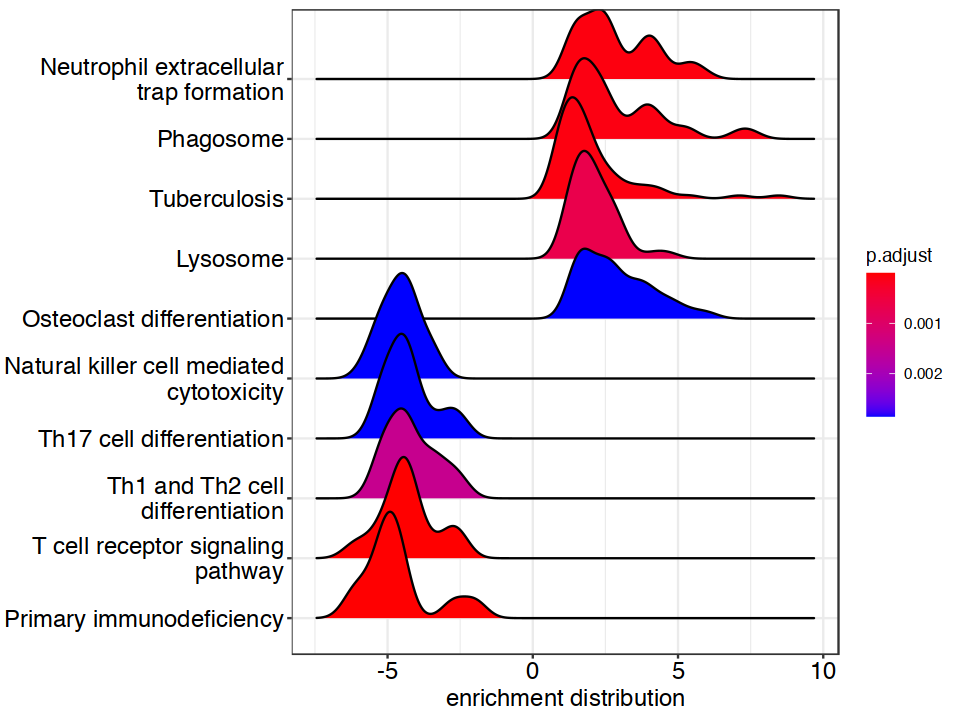

In [46]:
p

In [59]:
p <- gseaplot(kegg_gsea, by = "all", title = kegg_gsea$Description[1])

ERROR: Error in .local(x, geneSetID, by, title, ...): argument "geneSetID" is missing, with no default


In [70]:
c8Genes <- msigdbr('Homo sapiens', category = 'C8')

In [71]:
saveRDS(c8Genes, 'data/enrichData/c8Genes.RDS')

In [67]:
gseaplot(mf_gsea, geneSetID = 1, by = "all")#, title = kegg_gsea$Description[1])

ERROR while rich displaying an object: Error in Ops.data.frame(guide_loc, panel_loc): ‘==’ only defined for equally-sized data frames

Traceback:
1. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
2. tryCatchList(expr, classes, parentenv, handlers)
3. tryCatchOne(expr, names, parentenv, handlers[[1L]])
4. doTryCatch(return(expr), name, parentenv, handler)
5. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
6. repr::mime2repr[[mime]](obj)
7. repr_text.d

## GSVA

<img src="data/figure/GSVA.jpeg" style="width:80%;position:relative;left:10%" alt='IMG'>

1. 累积密度函数核估计(kcdf): 这两个图显示了两个模拟的表达谱，模拟了来自微阵列和 RNA-seq 数据的 6 个样本。 x 轴对应于表达值，g1基因为例，在四个样本中低表达，而在其他两个样本中高表达。 kcdf 的值在左侧 y 轴上，高斯和泊松核的值在右侧 y 轴上
2. 每个样本根据累计密度值对基因进行排序。
3. 对每个基因集，计算类似KS检验的统计量（类比于KS检验的经验累计密度分布与理论累计密度分布，以图中为例就是红色线的长度减去蓝色线的长度）。
4. 最后的输出矩阵每一行代表了一个基因集，每一列代表了一个样本

下面的公式分别代表了假设基因表达服从正态分布和泊松分布时的累计密度估计，用通俗的语言来描述一下：假设有6个样本，对于基因A，分别以每个样本的表达值为均值的分布（也就是6个分布），计算每个样本的A基因在这6个分布的累计概率，并计算平均值，得到的每个样本的平均值就作为排序的依据。

$$
F_{h_i} = \frac{1}{n}\sum\limits_{k=1}^{n}\int_{-\infty}^{\frac{x_{ij}-x_{ik}}{h_i}}\frac{1}{\sqrt{2\Pi}}e^{-\frac{t^2}{2}}\text dt
$$

$$
F_{r} = \frac{1}{n}\sum\limits_{k=1}^n\sum\limits_{y=0}^{x_{ij}}\frac{e^{-(x_{ik}+r)}(x_{ik}+r)^y}{y!}
$$

In [34]:
c2Genes <- msigdbr('Mus musculus', category = 'C2')

In [36]:
exprdata <- GetAssayData(sce, assay = 'Spatial', slot='data')

In [38]:
brain_pathway <- c('LEIN_LOCALIZED_TO_DISTAL_AND_PROXIMAL_DENDRITES',
                   'LEIN_MEDULLA_MARKERS',
                   'LEIN_MIDBRAIN_MARKERS',
                   'LEIN_OLIGODENDROCYTE_MARKERS',
                   'LEIN_PONS_MARKERS',
                   'PID_ALPHA_SYNUCLEIN_PATHWAY',
                   'LEIN_NEURON_MARKERS',
                   'LEIN_ASTROCYTE_MARKERS',
                   'KEGG_NEUROACTIVE_LIGAND_RECEPTOR_INTERACTION',
                   'REACTOME_NEURONAL_SYSTEM')

In [39]:
genesets <- c2Genes[c2Genes$gs_name %in% brain_pathway,]

In [40]:
genesets <- split(genesets$gene_symbol, genesets$gs_name)

In [41]:
#brain_gsva_res <- gsva(exprdata, genesets , method='gsva')

In [42]:
#saveRDS(brain_gsva_res, 'data/results/GSVA_result.rds')
brain_gsva_res <- readRDS('data/results/GSVA_result.rds')

In [43]:
anterior1@meta.data[, brain_pathway] <- t(brain_gsva_res)

In [44]:
brain_pathway

[1] "LEIN_LOCALIZED_TO_DISTAL_AND_PROXIMAL_DENDRITES"
 [2] "LEIN_MEDULLA_MARKERS"                           
 [3] "LEIN_MIDBRAIN_MARKERS"                          
 [4] "LEIN_OLIGODENDROCYTE_MARKERS"                   
 [5] "LEIN_PONS_MARKERS"                              
 [6] "PID_ALPHA_SYNUCLEIN_PATHWAY"                    
 [7] "LEIN_NEURON_MARKERS"                            
 [8] "LEIN_ASTROCYTE_MARKERS"                         
 [9] "KEGG_NEUROACTIVE_LIGAND_RECEPTOR_INTERACTION"   
[10] "REACTOME_NEURONAL_SYSTEM"

In [45]:
library(ggplot2)

In [46]:
p1 <- SpatialDimPlot(anterior1, label=T)

p2 <- SpatialFeaturePlot(anterior1, 'REACTOME_NEURONAL_SYSTEM')

p3 <- ggplot(anterior1@meta.data, aes(x=seurat_clusters, y=REACTOME_NEURONAL_SYSTEM, fill=seurat_clusters)) +
      geom_boxplot(notch = T, width=0.5, outlier.color = NA)

Scale for 'fill' is already present. Adding another scale for 'fill', which
will replace the existing scale.



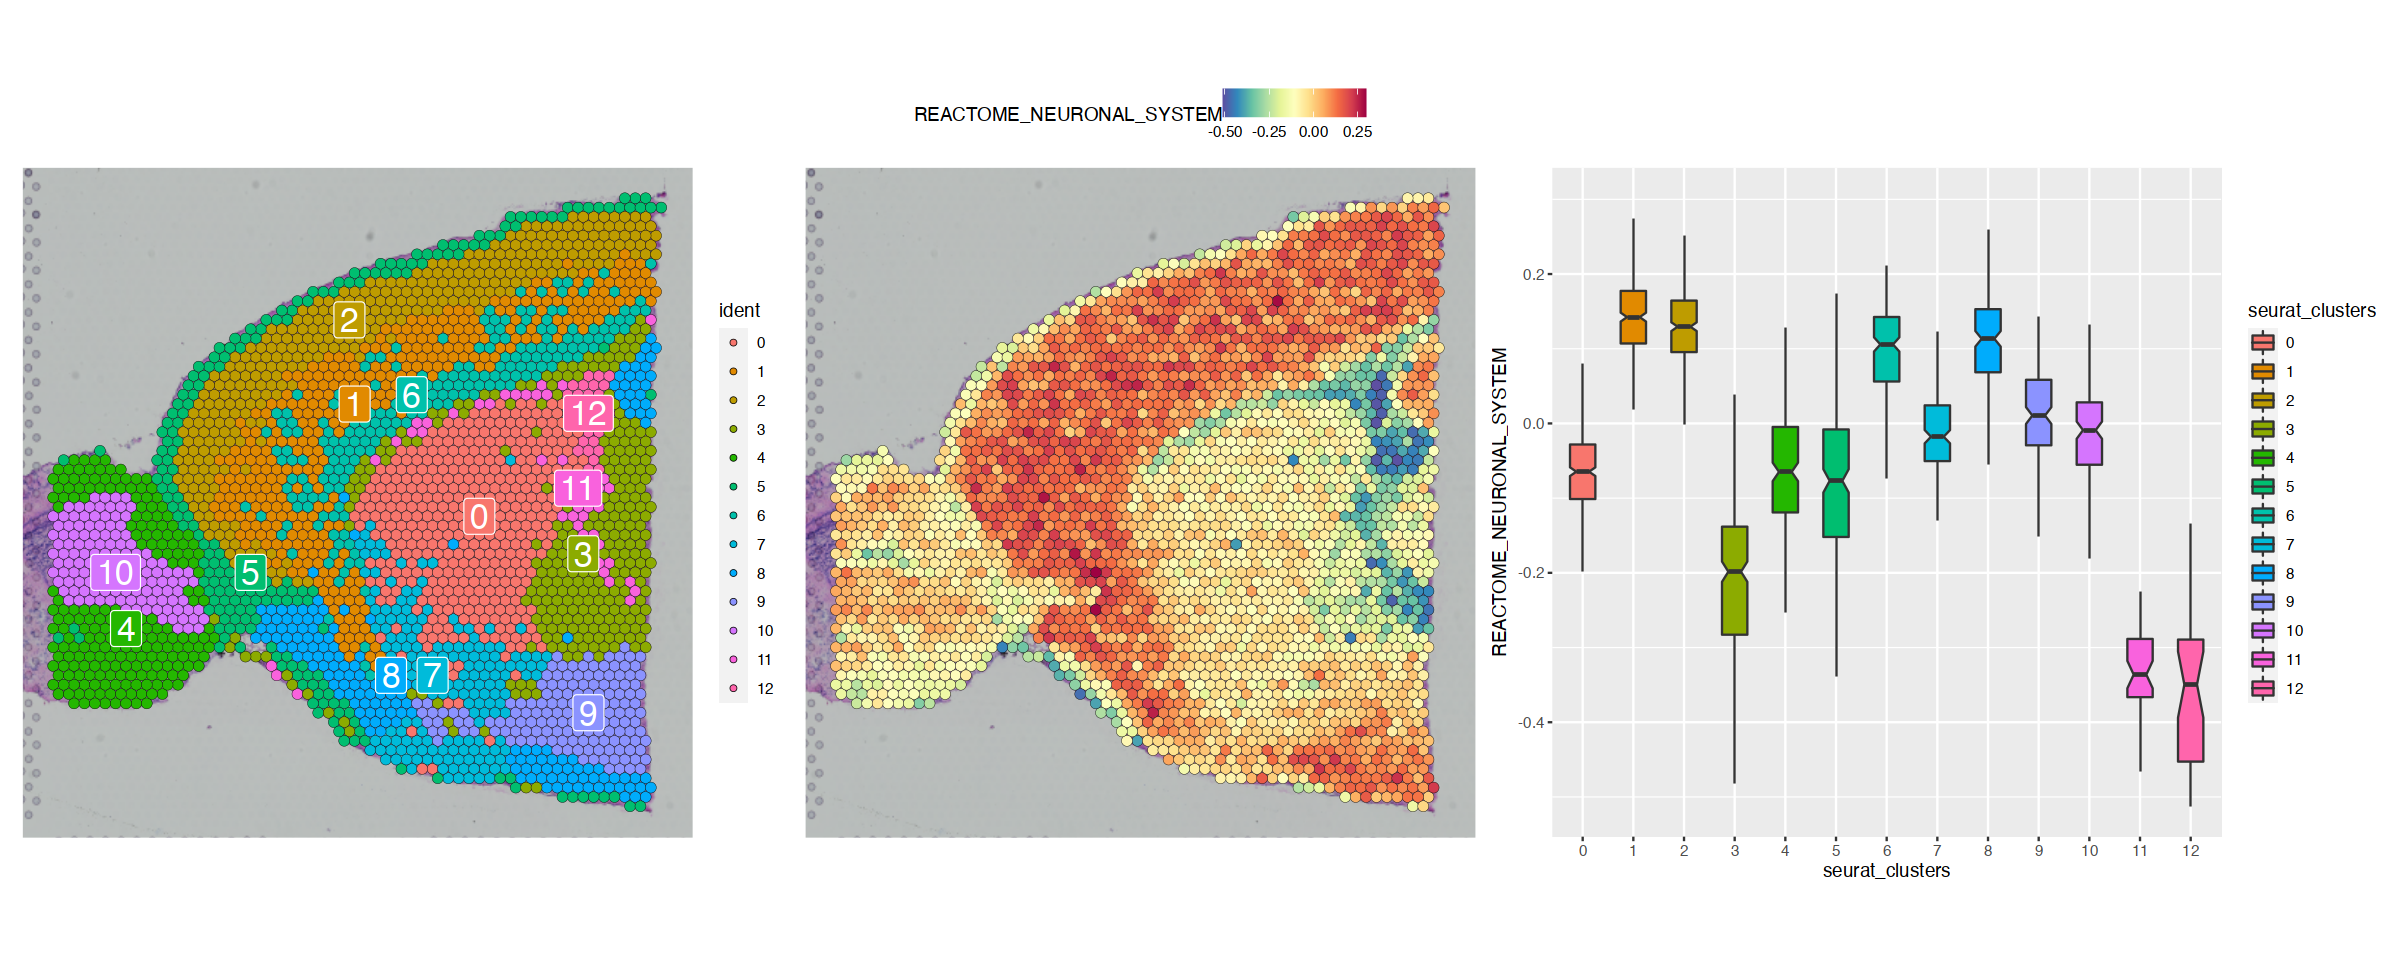

In [47]:
options(repr.plot.width=20, repr.plot.height=8)
p1+p2+p3

这里实际上在单细胞数据分析上用的比较多，比如给一个基因集，看一下不同细胞之间或者不同类群之间的差异，也可以用ES得分进行t检验，检验不同类群之间的差异等，另外的像AUCell也是很长用的。

#### KEGG富集分析

文件的下载方法可以参考这里：https://www.kegg.jp/kegg/rest/keggapi.html, 比如后面用的文件下载地址：  
pathway的描述文件mmu.pathway2description.txt：https://rest.kegg.jp/list/pathway/mmu  
pathway包含的基因文件mmu.hsaID2pathID.txt：https://rest.kegg.jp/link/pathway/mmu  
这么做的好处是准确性和实效性都有保证。

In [51]:
columns(org.Mm.eg.db)

[1] "ACCNUM"       "ALIAS"        "ENSEMBL"      "ENSEMBLPROT"  "ENSEMBLTRANS"
 [6] "ENTREZID"     "ENZYME"       "EVIDENCE"     "EVIDENCEALL"  "GENENAME"    
[11] "GENETYPE"     "GO"           "GOALL"        "IPI"          "MGI"         
[16] "ONTOLOGY"     "ONTOLOGYALL"  "PATH"         "PFAM"         "PMID"        
[21] "PROSITE"      "REFSEQ"       "SYMBOL"       "UNIPROT"

In [52]:
kegg <- read.table('data/KEGG/mmu.hsaID2pathID.txt', col.names = c('entrzid', 'pathway'))
head(kegg)

,entrzid,pathway
,<chr>,<chr>
1,mmu:103988,path:mmu00010
2,mmu:106557,path:mmu00010
3,mmu:110695,path:mmu00010
4,mmu:11522,path:mmu00010
5,mmu:11529,path:mmu00010
6,mmu:11532,path:mmu00010


In [53]:
keggdesc <- read.table('data/KEGG/mmu.pathway2description.txt', sep='\t', col.names = c('pathway', 'description'))
head(keggdesc)

,pathway,description
,<chr>,<chr>
1,mmu01100,Metabolic pathways - Mus musculus (house mouse)
2,mmu01200,Carbon metabolism - Mus musculus (house mouse)
3,mmu01210,2-Oxocarboxylic acid metabolism - Mus musculus (house mouse)
4,mmu01212,Fatty acid metabolism - Mus musculus (house mouse)
5,mmu01230,Biosynthesis of amino acids - Mus musculus (house mouse)
6,mmu01232,Nucleotide metabolism - Mus musculus (house mouse)


In [54]:
keggdkeggdescscription <- gsub(' - Mus musculus \\(house mouse\\)', '', keggdesc$description)

In [55]:
kegg$entrzid <- gsub('mmu:', '', kegg$entrzid, )
kegg$pathway <- gsub('path:', '', kegg$pathway, )
kegg <- kegg[, c(2,1)]

In [56]:
head(kegg)

,pathway,entrzid
,<chr>,<chr>
1,mmu00010,103988
2,mmu00010,106557
3,mmu00010,110695
4,mmu00010,11522
5,mmu00010,11529
6,mmu00010,11532


In [57]:
anterior1 <- readRDS('data/stxBrain/withMarker_anterior1.rds')

In [58]:
genes <- subset(anterior1@misc$marker_res0.8_all, cluster==2 & avg_log2FC >=0.5)$gene

In [59]:
genesid <- AnnotationDbi::select(org.Mm.eg.db, keys=genes, columns=c('ENTREZID', 'GENENAME', 'ENSEMBL'), keytype = 'SYMBOL')
enkegg <- enricher(genesid$ENTREZID, TERM2GENE = kegg, TERM2NAME = keggdesc)

'select()' returned 1:1 mapping between keys and columns



In [60]:
head(enkegg@result[, c(1,2,5,6,9)])

,ID,Description,pvalue,p.adjust,Count
,<chr>,<chr>,<dbl>,<dbl>,<int>
mmu04911,mmu04911,Insulin secretion - Mus musculus (house mouse),1.122444e-07,6.061199e-06,4
mmu05031,mmu05031,Amphetamine addiction - Mus musculus (house mouse),8.420249e-04,1.789625e-02,2
mmu04971,mmu04971,Gastric acid secretion - Mus musculus (house mouse),9.942364e-04,1.789625e-02,2
mmu04925,mmu04925,Aldosterone synthesis and secretion - Mus musculus (house mouse),1.830835e-03,2.463722e-02,2
mmu04972,mmu04972,Pancreatic secretion - Mus musculus (house mouse),2.281224e-03,2.463722e-02,2
mmu04921,mmu04921,Oxytocin signaling pathway - Mus musculus (house mouse),4.070977e-03,3.262339e-02,2


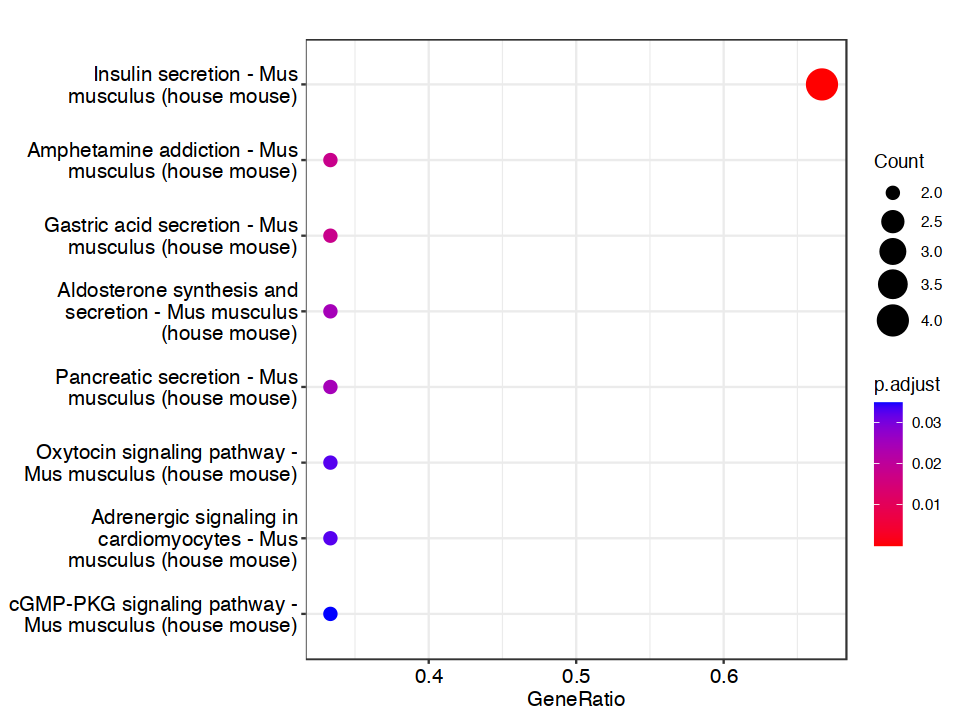

In [61]:
options(repr.plot.width=8, repr.plot.height=6)
dotplot(enkegg, showCategory = 10, orderBy='x')